In [24]:
import numpy as np
import numpy.ma as ma
import cairocffi as cairo
from skimage import transform
import matplotlib.pyplot as plt
%matplotlib inline

In [191]:
def sensor_function(diameter, d, theta=0, phi=0):
    """
    Generates a 2D devonvolution kernel with a circular shape.

    Parameters
    ----------
    diameter : float
        diameter of the sensor in pixels
    sigma : float, optional
        width of the gaussian filter in pixels
    theta : float
        tilt angle of the sensor in degree
    phi : float
        direction angle of tilting in degree
    z0 : float
        mean distance of the sensor to the object in pixel

    Returns
    -------
    kernel : 2D array
        The deconvolution kernel
    """
    dim = int(np.ceil(diameter))
    surface = cairo.ImageSurface(cairo.FORMAT_ARGB32, dim, dim)
    contex = cairo.Context(surface)

    radius = diameter / 2
    center = dim / 2
    contex.arc(center, center, radius, 0, 2 * np.pi)
    contex.fill()
    kernel = np.frombuffer(surface.get_data(), dtype=np.uint32).astype(np.float64)
    kernel = kernel.reshape(dim, dim)
    kernel /= kernel.max()

    x = np.arange(dim, dtype=np.float) - (dim - 1) /  2
    f = 1 / (d + x * np.tan(theta))
    kernel *= f
    
    #kernel *= np.cos(theta)
    kernel = transform.rescale(kernel, (1, np.cos(theta)), order=3, clip=False, mode='constant')
    #kernel = transform.rotate(kernel, phi, resize=True, order=3, clip=False, mode='constant')
    return kernel


In [192]:
def C_sim(R, d, theta, px=500):
    cs = []
    for t in theta:
        csim = sensor_function(R * 2 * px, d * px, t * np.pi / 180).sum() / px
        cs.append(csim / (R**2 * np.pi) * d)
    return np.array(cs)

In [193]:
def C_me(R, d, theta):
    return 1 + 0.25 * (R * np.tan(theta * np.pi / 180) / d)**2

In [196]:
px = 1000  # px / mm
diameter = 2.57
R = diameter / 2
d = 0.1
theta = np.linspace(0, 4, 5)
cs = C_sim(R, d, theta, px)
cm = C_me(R, d, theta)

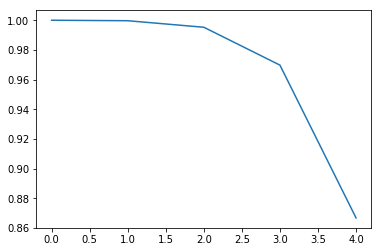

In [197]:
plt.plot(theta, cm / cs)

In [94]:
(distance == 0).astype(int)

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ..., 
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]])

In [97]:
cm / cs

array([ 1.00001816,  1.00001998,  1.00002489,  1.00003115,  1.00003584,
        1.00003486,  1.00002285,  0.99999321,  0.99993803,  0.99984799])

In [120]:
np.arcsin(d/R) * 180 / np.pi

4.4633283485033282

In [144]:
np.cos(4 * np.pi / 180)

0.9975640502598242